<a href="https://www.kaggle.com/code/ahmedanwar89/country-data-ml-kmeans-agglomerativeclustering-dbs?scriptVersionId=152858321" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Import Dataset

In [2]:
df = pd.read_csv('/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv')

In [3]:
df.sample(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
114,Norway,3.2,39.7,9.48,28.5,62300,5.95,81.0,1.95,87800
139,Spain,3.8,25.5,9.54,26.8,32500,0.16,81.9,1.37,30700
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970


In [4]:
df.shape

(167, 10)

***About Dataset***  
Clustering the Countries by using Unsupervised Learning for HELP International
Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

***About organization:***  
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

***Problem Statement:***  
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

# Data Clean

In [5]:
# check data type
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [6]:
# check duplicated values
df.duplicated().any(), df.duplicated().sum()

(False, 0)

In [7]:
# check null values
df.isnull().any(), df.isnull().sum()

(country       False
 child_mort    False
 exports       False
 health        False
 imports       False
 income        False
 inflation     False
 life_expec    False
 total_fer     False
 gdpp          False
 dtype: bool,
 country       0
 child_mort    0
 exports       0
 health        0
 imports       0
 income        0
 inflation     0
 life_expec    0
 total_fer     0
 gdpp          0
 dtype: int64)

In [8]:
# check data validity for object columns
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() <= 15:
        print('column name: ' + col)
        print('number of unique values: ' + str(df[col].nunique()))
        print('the unique values are: ' + df[col].unique())
    elif df[col].nunique() > 15:
        print('column name: ' + col)
        print('number of unique values: ' + str(df[col].nunique()))

column name: country
number of unique values: 167


In [9]:
# check data validity for numerical columns
df.select_dtypes(exclude='object').describe().round(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,17144.69,7.78,70.56,2.95,12964.16
std,40.33,27.41,2.75,24.21,19278.07,10.57,8.89,1.51,18328.70
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,3355.00,1.81,65.30,1.80,1330.00
50%,19.30,35.00,6.32,43.30,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,51.35,8.60,58.75,22800.00,10.75,76.80,3.88,14050.00
max,208.00,200.00,17.90,174.00,125000.00,104.00,82.80,7.49,105000.00


In [10]:
# drop 'country' column and save new DataFrame as train_df
train_df = df.drop(columns='country')

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# transform DataFram 'train_df' with StandardScaler() to avoid conflecting in model
scaler_df = StandardScaler().fit_transform(train_df)

# Build Model

## KMeans

In [13]:
from sklearn.cluster import KMeans

In [14]:
# create empty list named 'inertia_list' to save every new value of inertia.
inertia_list=[]
# for loop to build model then fit it with data then evaluate it by measure its inertia
for i in range(1, 15, 1):
    # build model with KMeans Algorthim
    model = KMeans(n_clusters=i, random_state=1, n_init='auto')
    # fit model with data 'scaler_df'
    model.fit_transform(scaler_df)
    # measure inertia of model and save it in a variable named 'inertia'
    inertia = model.inertia_
    # add the new value of inertia to 'inertia_list'
    inertia_list.append(inertia)
    # print the output
    print('number of clusters: %d \t\t inertia is: %d'%(i, inertia))


number of clusters: 1 		 inertia is: 1503
number of clusters: 2 		 inertia is: 1050
number of clusters: 3 		 inertia is: 831
number of clusters: 4 		 inertia is: 758
number of clusters: 5 		 inertia is: 681
number of clusters: 6 		 inertia is: 592
number of clusters: 7 		 inertia is: 562
number of clusters: 8 		 inertia is: 539
number of clusters: 9 		 inertia is: 456
number of clusters: 10 		 inertia is: 401
number of clusters: 11 		 inertia is: 380
number of clusters: 12 		 inertia is: 370
number of clusters: 13 		 inertia is: 349
number of clusters: 14 		 inertia is: 334


In [15]:
# visulization of Elbow Method to detremine optimal number of clusters.
fig = px.line(x=range(1, 15, 1),
              y=inertia_list,
              markers=True,
              title='Elbow Method for Optimal K')

fig.update_xaxes(title='number of clusters')
fig.update_yaxes(title='inertia')

fig.show()

In [16]:
# from previous the optimal k equal 9
# build model with n_clusters=7
model = KMeans(n_clusters=9, n_init='auto', random_state=1)
# fit model with data 'scaler_df'
model.fit(scaler_df)
# get the labels (clustring)
KMeans_labels = model.labels_
# print output
print(KMeans_labels)

[0 6 3 7 6 3 3 2 2 3 6 1 3 6 1 2 1 7 1 3 6 5 3 2 6 7 0 1 7 2 1 7 7 6 3 3 5
 7 7 6 7 6 6 6 2 3 6 3 6 7 5 1 1 2 2 5 5 6 2 5 2 6 3 7 0 1 7 1 2 3 3 3 5 2
 2 2 3 2 1 3 5 0 2 1 5 6 6 0 0 3 1 4 6 5 7 1 1 7 4 7 1 0 6 3 6 3 7 3 5 3 2
 2 7 8 2 3 5 1 1 3 3 6 6 2 6 3 0 5 3 5 6 1 0 4 1 6 1 5 6 2 3 3 5 6 2 2 5 5
 1 0 0 5 1 3 1 0 6 2 2 2 6 3 5 3 1 5 7]


In [17]:
# create new column named 'group' in DataFrame df by labels data.
df['group'] = KMeans_labels

In [18]:
# print group number and name of its countries
for x in np.array(df['group'].unique()):
    print('group number: %d'%x)
    print(np.array(df[df['group']==x]['country']))

group number: 0
['Afghanistan' 'Burundi' 'Guinea-Bissau' 'Kiribati' 'Lesotho' 'Liberia'
 'Micronesia, Fed. Sts.' 'Rwanda' 'Sierra Leone' 'Timor-Leste' 'Togo'
 'Uganda']
group number: 6
['Albania' 'Antigua and Barbuda' 'Bahamas' 'Barbados'
 'Bosnia and Herzegovina' 'Bulgaria' 'Chile' 'Costa Rica' 'Croatia'
 'Cyprus' 'Czech Republic' 'Ecuador' 'El Salvador' 'Georgia' 'Grenada'
 'Latvia' 'Lebanon' 'Macedonia, FYR' 'Moldova' 'Montenegro' 'Poland'
 'Portugal' 'Romania' 'Serbia' 'Slovenia' 'South Korea' 'Suriname'
 'Ukraine' 'Uruguay']
group number: 3
['Algeria' 'Argentina' 'Armenia' 'Azerbaijan' 'Bangladesh' 'Bolivia'
 'Brazil' 'China' 'Colombia' 'Dominican Republic' 'Egypt' 'Guatemala'
 'India' 'Indonesia' 'Iran' 'Jamaica' 'Kazakhstan' 'Libya' 'Mongolia'
 'Morocco' 'Myanmar' 'Nepal' 'Oman' 'Peru' 'Philippines' 'Russia'
 'Saudi Arabia' 'Sri Lanka' 'St. Vincent and the Grenadines' 'Turkey'
 'Uzbekistan' 'Venezuela']
group number: 7
['Angola' 'Benin' 'Burkina Faso' 'Cameroon' 'Central African

## AgglomerativeClustering

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
from scipy.cluster import hierarchy

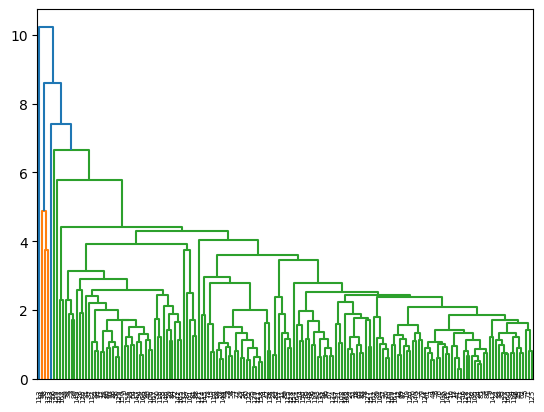

In [21]:
fig = hierarchy.dendrogram(hierarchy.linkage(y=scaler_df, method='average'))

In [22]:
# build model
model = AgglomerativeClustering(n_clusters=3, linkage='average')
# fit model with data 'scaler_df'
model.fit(scaler_df)
# get labels and save it in variable named 'AgglomerativeClustering_labels'
AgglomerativeClustering_labels = model.labels_
# print labels
print(AgglomerativeClustering_labels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [23]:
# save 'AgglomerativeClustering_labels' in column 'group'.
df['group'] = AgglomerativeClustering_labels

In [24]:
# print group number and name of its countries
for x in np.array(df['group'].unique()):
    print('group number: %d'%x)
    print(np.array(df[df['group']==x]['country']))

group number: 0
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesot

## DBSCAN

In [25]:
from sklearn.cluster import DBSCAN

In [26]:
# build model
model = DBSCAN(eps=1, min_samples=5)
# fit model
model.fit(scaler_df)
# get the labels
DBscan_labels = model.labels_
# print the labels
print(DBscan_labels)

[ 2  0 -1 -1  0 -1  0  1  1 -1  0 -1 -1  0 -1 -1  0 -1  0 -1  0 -1  0 -1
  0 -1 -1  0 -1  1  0 -1 -1  0  0  0 -1 -1 -1  0 -1  0 -1  0  1  0  0 -1
  0 -1 -1  0  0  1  1 -1 -1  0  1 -1  1  0  0 -1 -1  0 -1  0  1 -1 -1 -1
 -1 -1 -1  1  0  1 -1 -1 -1 -1 -1  0 -1  0  0 -1 -1 -1  0 -1  0 -1  2 -1
  0 -1 -1 -1  0 -1 -1 -1  0  0  2 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  0  0
  0  0  1 -1  0 -1 -1 -1 -1 -1  0 -1 -1 -1  0  0 -1 -1  0  1 -1  0 -1 -1
  1 -1 -1  2 -1 -1 -1 -1  0  0 -1 -1 -1 -1  1 -1  0 -1  0 -1 -1 -1  2]


In [27]:
df['group'] = DBscan_labels

In [28]:
for val in df['group'].unique():
    print('group number: %d'%val)
    print(np.array(df[df['group']==val]['country']))

group number: 2
['Afghanistan' 'Malawi' 'Mozambique' 'Tanzania' 'Zambia']
group number: 0
['Albania' 'Antigua and Barbuda' 'Armenia' 'Bahamas' 'Barbados' 'Belize'
 'Bhutan' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cambodia'
 'Cape Verde' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia'
 'Czech Republic' 'Dominican Republic' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Georgia' 'Grenada' 'Guatemala' 'Guyana' 'Hungary' 'Jamaica'
 'Kyrgyz Republic' 'Latvia' 'Lebanon' 'Lithuania' 'Macedonia, FYR'
 'Maldives' 'Mauritius' 'Montenegro' 'Morocco' 'Paraguay' 'Peru'
 'Philippines' 'Poland' 'Romania' 'Serbia' 'Slovak Republic' 'Slovenia'
 'South Korea' 'St. Vincent and the Grenadines' 'Tunisia' 'Turkey'
 'Uruguay' 'Vanuatu']
group number: -1
['Algeria' 'Angola' 'Argentina' 'Azerbaijan' 'Bahrain' 'Bangladesh'
 'Belarus' 'Belgium' 'Benin' 'Bolivia' 'Botswana' 'Brunei' 'Burkina Faso'
 'Burundi' 'Cameroon' 'Central African Republic' 'Chad' 'Comoros'
 'Congo, Dem. Rep.' 'Congo, Rep.' "Cote d'Ivoir